# 线性回归

## 原理

建模时采用线性代数表示法会比较方便。当我们的输入 包含 $d$ 个特征时，我们将预测结果 $\hat{y}$ （通常使用“尖角"符号表示 $y$ 的估计值）表示为：
$$
\hat{y}=w_1 x_1+\ldots+w_d x_d+b
$$
将所有特征放到向量 $\mathbf{x} \in \mathbb{R}^d$ 中, 并将所有权重放到向量 $\mathbf{w} \in \mathbb{R}^d$ 中, 我们可以用点积形式来简洁地表达模 型:
$$
\hat{y}=\mathbf{w}^{\top} \mathbf{x}+b
$$
向量 $\mathbf{x}$ 对应于单个数据样本的特征。用符号表示的矩阵 $\mathbf{X} \in \mathbb{R}^{n \times d}$ 可以很方便地引用我们整个 数据集的 $n$ 个样本。其中, $\mathbf{X}$ 的每一行是一个样本, 每一列是一种特征。
对于特征集合 $\mathbf{X}$, 预测值 $\hat{\mathbf{y}} \in \mathbb{R}^n$ 可以通过矩阵-向量乘法表示为:
$$
\hat{\mathbf{y}}=\mathbf{X} \mathbf{w}+b
$$

## 损失函数

损失函数 (loss function）能够量化目标的实际值与预测値之间的差距。

通常我们会选择非负数作为损失, 且数值越小表示 损失越小, 完美预测时的损失为 0 。 

回归问题中最常用的损失函数是平方误差函数。当样本 $i$ 的预测值为 $\hat{y}^{(i)}$ , 其相应的真实标签为 $y^{(i)}$ 时, 平方误差可以定义为以下公式:
$$
l^{(i)}(\mathbf{w}, b)=\frac{1}{2}\left(\hat{y}^{(i)}-y^{(i)}\right)^2 .
$$

由于平方误差函数中的二次方项, 估计值 $\hat{y}^{(i)}$ 和观测值 $y^{(i)}$ 之间较大的差异将导致更大的损失。为了度量模型 在整个数据集上的质量, 我们需计算在训练集 $n$ 个样本上的损失均值（也等价于求和）。
$$
L(\mathbf{w}, b)=\frac{1}{n} \sum_{i=1}^n l^{(i)}(\mathbf{w}, b)=\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right)^2 .
$$
在训练模型时, 我们希望寻找一组参数 $\left(\mathbf{w}^*, b^*\right)$, 这组参数能最小化在所有训练样本上的总损失。如下 式:
$$
\mathbf{w}^*, b^*=\underset{\mathbf{w}, b}{\operatorname{argmin}} L(\mathbf{w}, b) .
$$

## 解析解

$$\mathbf{w}^*=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y}$$

## 随机梯度下降

我们用下面的数学公式来表示这一更新过程（ $\partial$ 表示偏导数）：
$$
(\mathbf{w}, b) \leftarrow(\mathbf{w}, b)-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w}, b)} l^{(i)}(\mathbf{w}, b)
$$

(1) 初始化模型参数的值, 如随机初始化; 

(2) 从数据集中随机抽取小批 量样本且在负梯度的方向上更新参数, 并不断迭代这一步骤。

$$
\begin{aligned}
& \mathbf{w} \leftarrow \mathbf{w}-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b)=\mathbf{w}-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right), \\
& b \leftarrow b-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)=b-\frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(\mathbf{w}^{\top} \mathbf{x}^{(i)}+b-y^{(i)}\right) .
\end{aligned}
$$

## 正态分布与平方损失

正态分布 (normal distribution) ，也称为高斯分布 (Gaussian distribution）, 最早由德国数学家高斯 (Gauss) 应用于天文学研究。简单的说, 若随机变量 $x$ 具有均值 $\mu$ 和方差 $\sigma^2($ 标准差 $\sigma)$  其 正 态 分 布 概 率 密 度 函 数 如 下: 
$$
p(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{1}{2 \sigma^2}(x-\mu)^2\right) \text {. }
$$

# 线性回归的从零开始实现

In [17]:
import random
import torch

In [18]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [19]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.1730, 0.1976]) 
label: tensor([3.8908])


## 读取数据集

In [20]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2648, -1.2165],
        [-2.2837,  1.0091],
        [ 1.0762, -2.6267],
        [-1.7232,  0.0795],
        [-1.4096, -1.2731],
        [ 1.0092,  0.2968],
        [-1.6104, -0.6171],
        [-0.2663, -0.8271],
        [ 0.7842, -0.4469],
        [-0.6497, -0.1279]]) 
 tensor([[ 5.7915],
        [-3.8102],
        [15.2821],
        [ 0.4795],
        [ 5.7176],
        [ 5.2223],
        [ 3.0864],
        [ 6.4658],
        [ 7.2795],
        [ 3.3497]])


## 初始化模型参数

In [21]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型

In [22]:
def linreg(X, w, b): 
    """线性回归模型"""
    return torch.matmul(X, w) + b

## 定义损失函数

In [23]:
def squared_loss(y_hat, y): 
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 定义优化算法 

In [24]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练

In [25]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033055
epoch 2, loss 0.000122
epoch 3, loss 0.000052


In [26]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 1.8358e-05, -5.1475e-04], grad_fn=<SubBackward0>)
b的估计误差: tensor([8.4877e-05], grad_fn=<RsubBackward1>)


# 线性回归的简洁实现

##  生成数据集

In [27]:
import numpy as np
import torch
from torch.utils import data
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声

    Defined in :numref:`sec_linear_scratch`"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 10)

In [28]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

## 定义模型

In [29]:
from torch import nn
import torch
net = nn.Sequential(nn.Linear(2, 1))

## 初始化模型参数

In [30]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 定义损失函数

In [31]:
loss = nn.MSELoss()

## 定义优化算法

In [32]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## 训练

In [33]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 22.386652
epoch 2, loss 20.433681
epoch 3, loss 18.652393


In [34]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 1.7247, -2.9353])
b的估计误差： tensor([3.6991])


# softmax回归

## 分类问题

## 网络架构

$$\begin{aligned} & o_1=x_1 w_{11}+x_2 w_{12}+x_3 w_{13}+x_4 w_{14}+b_1 \\ & o_2=x_1 w_{21}+x_2 w_{22}+x_3 w_{23}+x_4 w_{24}+b_2 \\ & o_3=x_1 w_{31}+x_2 w_{32}+x_3 w_{33}+x_4 w_{34}+b_3\end{aligned}$$


![](https://zh-v2.d2l.ai/_images/softmaxreg.svg)

## softmax运算

$$
\hat{\mathbf{y}}=\operatorname{softmax}(\mathbf{o}) \quad \text { 其中 } \quad \hat{y}_j=\frac{\exp \left(o_j\right)}{\sum_k \exp \left(o_k\right)}
$$



$$
\underset{j}{\operatorname{argmax}} \hat{y}_j=\underset{j}{\operatorname{argmax}} o_j .
$$

#  图像分类数据集

In [37]:
!git clone https://github.com/d2l-ai/d2l-zh.git
!cp -r d2l-zh/d2l ./

Cloning into 'd2l-zh'...
remote: Enumerating objects: 23869, done.
remote: Total 23869 (delta 0), reused 0 (delta 0), pack-reused 23869
Receiving objects: 100% (23869/23869), 287.46 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (16726/16726), done.


In [38]:
import torch
from torch.utils import data
import torchvision
from d2l import torch as d2l
from torchvision import transforms
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline


In [39]:
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图

    Defined in :numref:`sec_calculus`"""
    backend_inline.set_matplotlib_formats('svg')

## 读取数据集

In [40]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0～1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



## 查看数据

In [41]:
!tree ../data/FashionMNIST/raw

../data/FashionMNIST/raw
├── t10k-images-idx3-ubyte
├── t10k-images-idx3-ubyte.gz
├── t10k-labels-idx1-ubyte
├── t10k-labels-idx1-ubyte.gz
├── train-images-idx3-ubyte
├── train-images-idx3-ubyte.gz
├── train-labels-idx1-ubyte
└── train-labels-idx1-ubyte.gz

0 directories, 8 files


In [42]:
??torchvision.datasets.FashionMNIST

Init signature: torchvision.datasets.FashionMNIST(*args, **kwds)
Source:        
class FashionMNIST(MNIST):
    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

    Args:
        root (string): Root directory of dataset where ``FashionMNIST/raw/train-images-idx3-ubyte``
            and  ``FashionMNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        download (bool, optional): If True, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transf

In [43]:
!head ../data/FashionMNIST/raw/t10k-images-idx3-ubyte

����        5������ ���6������        P�����  '�  �^~����        e����������������        ~�������������������       ��������������������#       ����V�����������}���7       ����E�����������F���9       ����n�����������E���M       ����������������/���b       ���o���������������n       ���m������������7���x       ���r����������������       �����������������}��       ����������������߀��       ���9�������������4��       ���>������������� ��       ���             "��       L��             '��{       1��  ��C            C���u����                  ���������L                  ���������t                  ����������                 ���������                 C���������                 r���������                 �����������                 ����� �����                 ����� �����                 ����H �����                 ���� ����~                 ����  ����o                 ����  ����o                 ���  9���o                 ���  
���d                 ���q  ���Y      

In [44]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [45]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

## 转换数字标签索引及其文本名称

In [46]:
# Fashion-MNIST中包含的10个类别，
#分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、
#sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 
#以下函数用于在数字标签索引及其文本名称之间进行转换
def get_fashion_mnist_labels(labels): 
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

## 可视化样本

In [47]:
!cp -r d2l-zh/d2l ./

In [48]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>], dtype=object)

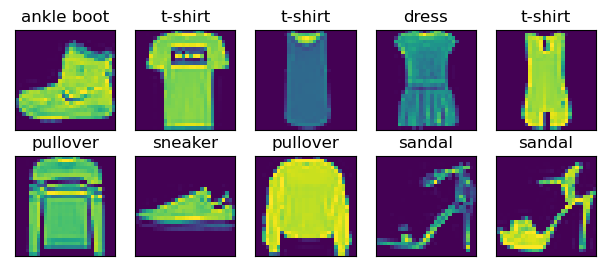

In [49]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 5, titles=get_fashion_mnist_labels(y))# 展示2行9列

## 读取小批量

In [50]:
atch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

In [51]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'11.95 sec'

## 整合所有组件


In [52]:
# load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 
#这个函数返回训练集和验证集的数据迭代器。 
#此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [53]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


# softmax回归的从零开始实现

In [54]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 初始化模型参数

In [55]:
num_inputs = 784
num_outputs = 10
# 使用正态分布初始化我们的权重W，偏置初始化为0
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

## 定义softmax操作

$$\operatorname{softmax}(\mathbf{X})_{i j}=\frac{\exp \left(\mathbf{X}_{i j}\right)}{\sum_k \exp \left(\mathbf{X}_{i k}\right)}$$

In [56]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [57]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    
    return X_exp / partition  # 这里应用了广播机制

In [58]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [59]:
torch.exp(X),torch.exp(X).sum(1, keepdim=True)

(tensor([[  2.7183,   7.3891,  20.0855],
         [ 54.5981, 148.4132, 403.4288]]),
 tensor([[ 30.1929],
         [606.4401]]))

In [60]:
X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.1951, 0.4733, 0.1841, 0.0323, 0.1152],
         [0.3708, 0.2453, 0.2666, 0.0229, 0.0945]]),
 tensor([1.0000, 1.0000]))

## 定义模型


In [61]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b) 

## 定义损失函数

In [62]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]


tensor([0.1000, 0.5000])

In [63]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [64]:
y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

In [65]:
len(y_hat),range(len(y_hat)),y_hat[range(len(y_hat)), y]

(2, range(0, 2), tensor([0.1000, 0.5000]))

## 分类精度

In [66]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [67]:
y_hat,y

(tensor([[0.1000, 0.3000, 0.6000],
         [0.3000, 0.2000, 0.5000]]),
 tensor([0, 2]))

In [68]:
accuracy(y_hat, y) / len(y)

0.5

In [69]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [70]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [71]:
evaluate_accuracy(net, test_iter)

0.1396

## 训练

In [72]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [73]:
class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [74]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [75]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

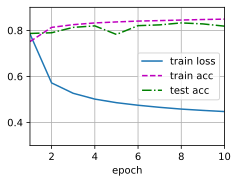

In [78]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

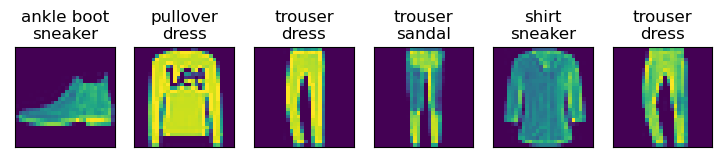

In [77]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

In [2]:
!ls 




__notebook_source__.ipynb
